In [16]:
%pylab inline
import gromacs.formats
import pandas as pd
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import pickle
import multiprocessing
import seaborn as sns

from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP

Populating the interactive namespace from numpy and matplotlib


/home/dldx/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
res_all1 = pickle.load(open('/home/dldx/machine learning/dssp/R_c/R_c_1-5.pkl','rb'))
res_all2 = pickle.load(open('/home/dldx/machine learning/dssp/R_c/R_c_6-10.pkl','rb'))

In [3]:
print(len(res_all1))
print(len(res_all1[0]))
print(len(res_all1[0][0]))
# print(np.array(res_all1[0]))
a = [1,2,3]
b = [1,1]
c = a + b

5
71
10001


In [3]:
res_all = res_all1 + res_all2
data_res_all = []
# 10条轨迹所有位点对应二级结构百分比统计
for k in range(10):
    data_res_all_test = []
    for i in range(0,71):
        site_res_all = []
        test = np.array(res_all[k][i])
        H_all = np.sum(test == 'H')/100010
        G_all = np.sum(test == 'G')/100010
        T_all = np.sum(test == 'T')/100010
        S_all = np.sum(test == 'S')/100010
        B_all = np.sum(test == 'B')/100010
        E_all = np.sum(test == 'E')/100010
        I_all = np.sum(test == 'I')/100010
        other_all = np.sum(test == '-')/100010
        site_res_all.append(H_all)
        site_res_all.append(G_all)
        site_res_all.append(T_all)
        site_res_all.append(S_all)
        site_res_all.append(B_all)
        site_res_all.append(E_all)
        site_res_all.append(I_all)
        site_res_all.append(other_all)
        data_res_all_test.append(site_res_all)
    data_res_all.append(data_res_all_test)

In [28]:
data_res_all[0]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00026997300269973005, 0.0, 0.09973002699730027],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.06472352764723528,
  0.0022097790220977904,
  0.0,
  0.03306669333066693],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.006669333066693331,
  0.039716028397160284,
  0.0,
  0.05361463853614638],
 [0.0,
  0.0,
  0.0,
  0.037036296370362966,
  0.0,
  0.03822617738226177,
  0.0,
  0.024737526247375262],
 [0.0,
  0.0,
  0.0,
  0.020027997200279972,
  0.04064593540645935,
  0.03822617738226177,
  0.0,
  0.0010998900109989002],
 [0.0, 0.0, 0.0, 0.0, 0.0, 3.999600039996e-05, 0.0, 0.09996000399960003],
 [0.0,
  0.0,
  0.0065993400659934,
  0.09291070892910709,
  0.0,
  3.999600039996e-05,
  0.0,
  0.00044995500449955],
 [0.0,
  0.0,
  0.006569343065693431,
  0.011788821117888211,
  0.02401759824017598,
  0.05536446355364463,
  0.0,
  0.00225977402259774],
 [0.0,
  0.0,
  0.0,
  0.00111988801119888,
  0.00197980201979802,
  0.05536446355364463,
  0.0,
  0.041535846415358464],
 [0.0,
  0.0,
  0.0,
  

In [4]:
# 统计所有轨迹在各个残基上二级结构得百分比
da1 = np.add(data_res_all[0],data_res_all[1])
da2 = np.add(data_res_all[2],da1)
da3 = np.add(data_res_all[3],da2)
da4 = np.add(data_res_all[4],da3)
da5 = np.add(data_res_all[5],da4)
da6 = np.add(data_res_all[6],da5)
da7 = np.add(data_res_all[7],da6)
da8 = np.add(data_res_all[8],da7)
da_all = np.add(data_res_all[9],da8)

In [ ]:
# helix：H G I    （0 1 6）
# sheet:B E       （4 5）
# coil: T S other （2 3 7）
# H G T S B E I -  分别对应 0 1 2 3 4 5 6 7

In [36]:
len(da_all)

71

In [5]:
sum1 = 0
sum2 = 0
sum3 = 0
result_data = []
for i in range(71):
    tt = []
    sum1 = da_all[i][0] + da_all[i][1] + da_all[i][6]
    sum2 = da_all[i][4] + da_all[i][5]
    sum3 = da_all[i][2] + da_all[i][3] + da_all[i][7]
    tt.append(sum1)       # helix：H G I    （0 1 6）
    tt.append(sum2)       # sheet:B E       （4 5）
    tt.append(sum3)       # coil: T S other （2 3 7）
    result_data.append(tt)

In [7]:
res_plot_data =[]
for i in range(3):
    cc =[]
    for k in range(0,71):
        cc.append(result_data[k][i])
    res_plot_data.append(cc)
print(len(res_plot_data[0]))

71


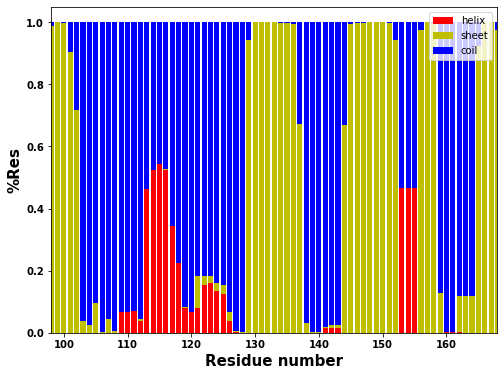

In [34]:
# R_close 
plt.subplots(figsize=(8, 6))

x = np.arange(98,169)
y = res_plot_data
plt.bar(x,y[0],align = 'center',color = 'r',label='helix')
a = y[0]
plt.bar(x,y[1],align = 'center',bottom=a ,color = 'y',label='sheet')
b = np.add(y[0],y[1])
plt.bar(x,y[2],align = 'center',bottom=b ,color = 'b',label='coil')

ylim(0.0,1.05)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(loc='upper right')
xlabel("Residue number",fontsize=15, family='Times New Roman',weight='bold')
ylabel(r"%Res",fontsize=15, family='Times New Roman',weight='bold')
# plt.savefig("R_close_scale.jpg", dpi=900) #指定分辨率保存
plt.show()